In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('House_rent_pred.csv')
df.head()

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Karen,3 BHK Apartment,500000,1500 sq.ft,Unfurnished,3,3,1.0,1300 sq.ft
1,Karen,3 BHK Apartment,500000,2200 sq.ft,Fully Furnished,3,1,2.0,1500 sq.ft
2,Karen,3 BHK Apartment,450000,2250 sq.ft,Unfurnished,4,Missing,0.0,2000 sq.ft
3,Karen,3 BHK Apartment,450000,2880 sq.ft,Unfurnished,4,Missing,0.0,2500 sq.ft
4,Karen,3 BHK Apartment,425000,2880 sq.ft,Unfurnished,3,1,2.0,2200 sq.ft


In [3]:
df.shape


(8720, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720 entries, 0 to 8719
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Locality              8720 non-null   object 
 1   Type                  8720 non-null   object 
 2   Rent/Month            8720 non-null   int64  
 3   Build_up_area(sq.ft)  8720 non-null   object 
 4   Furnishing            8720 non-null   object 
 5   Bathrooms             8720 non-null   object 
 6   Balcony               8720 non-null   object 
 7   Parking               8698 non-null   float64
 8   Carpet_area(sq.ft)    8720 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 613.2+ KB


In [5]:
df.Bathrooms.unique()

array(['3', '4', '2', 'Missing', '6', '5', '1'], dtype=object)

In [6]:
df.Bathrooms.replace("Missing",np.nan, inplace=True)

In [7]:
df.Bathrooms.unique()

array(['3', '4', '2', nan, '6', '5', '1'], dtype=object)

In [8]:
df.Balcony.unique()

array(['3', '1', 'Missing', '2', '4', '5', '6'], dtype=object)

In [9]:
df.Balcony.replace("Missing", np.nan, inplace=True)

In [10]:
df.Balcony.unique()

array(['3', '1', nan, '2', '4', '5', '6'], dtype=object)

In [11]:
df['Build_up_area(sq.ft)']=df['Build_up_area(sq.ft)'].str.split().str[0]

In [12]:
df['Build_up_area(sq.ft)'] = df['Build_up_area(sq.ft)'].astype('int')

In [13]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int32
Furnishing               object
Bathrooms                object
Balcony                  object
Parking                 float64
Carpet_area(sq.ft)       object
dtype: object

In [14]:
df["Carpet_area(sq.ft)"].replace("Missing",0, inplace=True)

In [15]:
df['Carpet_area(sq.ft)']=df['Carpet_area(sq.ft)'].str.split().str[0]

In [16]:
def to_num(s):
    if type(s)==str:
        return int(s)
    else:
        return s

In [17]:
df['Carpet_area(sq.ft)']=df['Carpet_area(sq.ft)'].apply(to_num)

<AxesSubplot:>

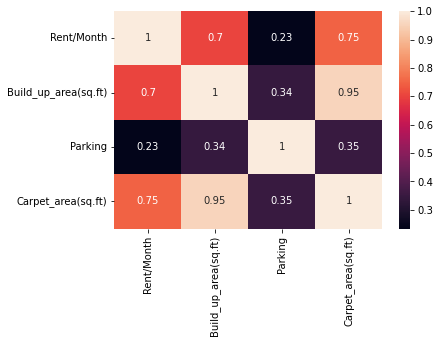

In [18]:
sns.heatmap(df.corr(),annot=True)

Build_up_area and Carpet area are strongly correlated with each other so dropping Carpet area column

In [19]:
df.drop('Carpet_area(sq.ft)',axis=1,inplace=True)

In [20]:
df.describe(). T

,count,mean,std,min,25%,50%,75%,max
Rent/Month,8720.0,35782.142775,40815.357631,7000.0,12000.0,18000.0,40000.0,500000.0
Build_up_area(sq.ft),8720.0,867.963417,414.111511,145.0,560.0,800.0,1100.0,3520.0
Parking,8698.0,0.918257,0.678594,0.0,0.0,1.0,1.0,4.0


In [21]:
df.isna().sum()

Locality                   0
Type                       0
Rent/Month                 0
Build_up_area(sq.ft)       0
Furnishing                 0
Bathrooms                224
Balcony                 5535
Parking                   22
dtype: int64

In [22]:
df.Parking.mode()[0]

1.0

In [23]:
df.Parking.fillna(df.Parking.mode()[0],inplace=True)

In [24]:
df[df.Type=='1 RK Apartment']['Bathrooms'].mode()[0]

'1'

In [25]:
i = df[(df.Type=='1 RK Apartment')&(df.Bathrooms.isna())].index
i

Int64Index([2429, 3846, 4655, 4656, 4715, 6092, 6191, 6246, 6247, 6248, 6327,
            6411, 6619, 6804, 6995, 7053, 7055, 7158, 7167, 7664, 7690, 7775,
            7779, 7921, 7938, 7988, 8047, 8077, 8146, 8150, 8151, 8171, 8235,
            8246, 8259, 8260, 8269, 8283, 8296, 8368, 8417, 8418, 8473, 8478,
            8479, 8549, 8555, 8557, 8561, 8578, 8602, 8606, 8621, 8639, 8648,
            8666, 8671, 8675, 8679, 8704, 8712, 8717, 8718],
           dtype='int64')

In [26]:
df.loc[i,'Bathrooms'] = 1

In [27]:
df[df.Type=='1 BHK Apartment']['Bathrooms'].mode()[0]

'1'

In [28]:
i = df[(df.Type=='1 BHK Apartment')&(df.Bathrooms.isna())].index
i


Int64Index([2401, 2403, 2552, 2832, 3199, 3291, 3369, 3639, 4145, 4206, 4299,
            4667, 4747, 4775, 5113, 5210, 5638, 5884, 5960, 6007, 6037, 6090,
            6183, 6189, 6298, 6300, 6357, 6362, 6436, 6461, 6513, 6535, 6560,
            6613, 6678, 6684, 6707, 6729, 6741, 6799, 6801, 6811, 6815, 6872,
            6908, 6950, 6961, 7033, 7072, 7089, 7090, 7297, 7396, 7478, 7490,
            7493, 7505, 7521, 7651, 7731, 7741, 7742, 7761, 7768, 7773, 7798,
            7883, 7885, 7944, 7957, 7961, 7971, 7992, 8008, 8040, 8085, 8234,
            8291, 8330, 8359, 8361, 8394, 8409, 8420, 8435, 8523, 8524],
           dtype='int64')

In [29]:
df.loc[i,'Bathrooms'] = 1

In [30]:
df[df.Type=='2 BHK Apartment']['Bathrooms'].mode()

0    2
dtype: object

In [31]:
i = df[(df.Type=='2 BHK Apartment')&(df.Bathrooms.isna())].index
i

Int64Index([ 600,  691,  736, 1022, 1308, 1309, 1310, 1350, 1427, 1525, 1571,
            1618, 1732, 1875, 1876, 1877, 1878, 1879, 1880, 2027, 2111, 2145,
            2508, 2520, 2659, 2808, 2974, 3067, 3209, 3255, 3358, 3679, 3836,
            4596, 4681, 4794, 5041, 5042, 5045, 5184, 5445, 5446, 5447, 5448,
            5449, 5514, 5515, 5517, 5522, 5585, 5932, 6299, 6309, 6344, 6880,
            7091, 7809],
           dtype='int64')

In [32]:
df.loc[i,'Bathrooms'] = 2

In [33]:
df[df.Type=='3 BHK Apartment']['Bathrooms'].mode()

0    3
dtype: object

In [34]:
i = df[(df.Type=='3 BHK Apartment')&(df.Bathrooms.isna())].index
i


Int64Index([  20,   21,   50,   74,  185,  186,  245,  264,  499,  797,  805,
            1001, 1163, 1557, 2357, 3156, 5098],
           dtype='int64')

In [35]:
df.loc[i,'Bathrooms']=3

In [36]:
df.Balcony.mode()[0]

'1'

In [37]:
df.Balcony.fillna(df.Balcony.mode()[0],inplace=True)

In [38]:
df.isna().sum()

Locality                0
Type                    0
Rent/Month              0
Build_up_area(sq.ft)    0
Furnishing              0
Bathrooms               0
Balcony                 0
Parking                 0
dtype: int64

In [39]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int32
Furnishing               object
Bathrooms                object
Balcony                  object
Parking                 float64
dtype: object

In [40]:
df.Balcony = df.Balcony.astype('int')
df.Bathrooms = df.Bathrooms.astype('int')

In [41]:
df.dtypes

Locality                 object
Type                     object
Rent/Month                int64
Build_up_area(sq.ft)      int32
Furnishing               object
Bathrooms                 int32
Balcony                   int32
Parking                 float64
dtype: object

### Checking Outliers

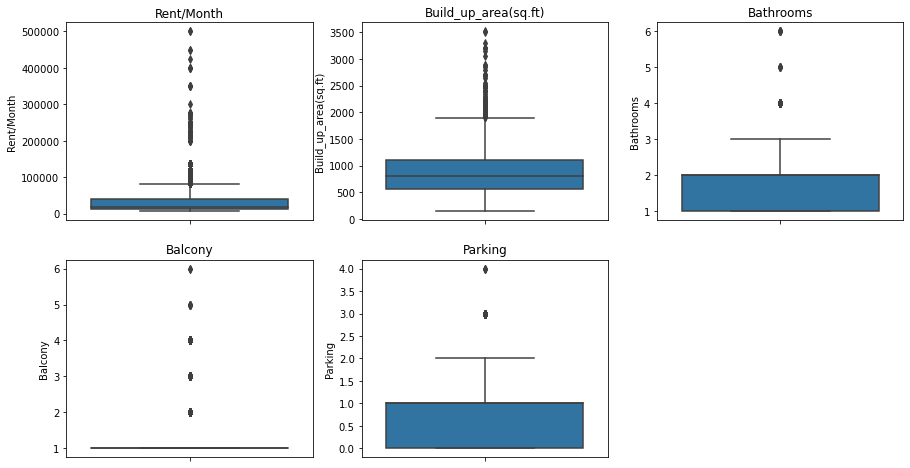

In [42]:
i=1
plt.figure(figsize=(15,8))
for x in df.columns:
    if df[x].dtypes != 'O':
        plt.subplot(2,3,i)
        plt.title(x)
        sns.boxplot(y=df[x])
        i+=1

In [43]:
# funnction to return index for column that have data points greater than given limit
def outs(df,col,limit):
    index = []
    index = df[df[col]>limit].index

    return index

ind = outs(df,'Rent/Month',400000)
ind

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [44]:
df[df['Rent/Month']>400000]

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
0,Karen,3 BHK Apartment,500000,1500,Unfurnished,3,3,1.0
1,Karen,3 BHK Apartment,500000,2200,Fully Furnished,3,1,2.0
2,Karen,3 BHK Apartment,450000,2250,Unfurnished,4,1,0.0
3,Karen,3 BHK Apartment,450000,2880,Unfurnished,4,1,0.0
4,Karen,3 BHK Apartment,425000,2880,Unfurnished,3,1,2.0


##### Plotting total aprtment rent for each type

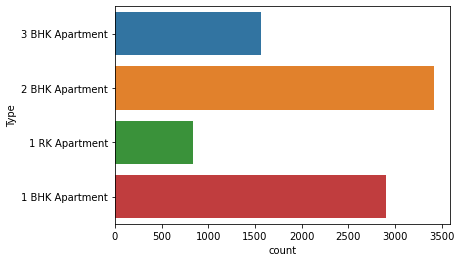

In [45]:
sns.countplot(y=df.Type)
plt.show()

In [46]:
df.groupby('Type')['Rent/Month'].mean().sort_values(ascending=False)

Type
3 BHK Apartment    90056.731410
2 BHK Apartment    36014.715833
1 BHK Apartment    13896.450724
1 RK Apartment      9681.331748
Name: Rent/Month, dtype: float64

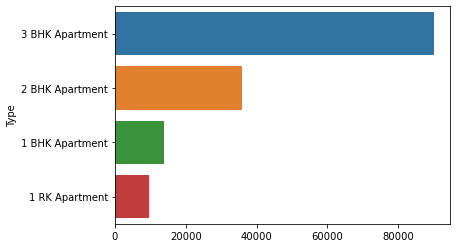

In [47]:
sns.barplot(y=df.groupby('Type')['Rent/Month'].mean().sort_values(ascending=False).index,x=df.groupby('Type')['Rent/Month'].mean().sort_values(ascending=False).values)
plt.show()

#### Average rent foro each locality

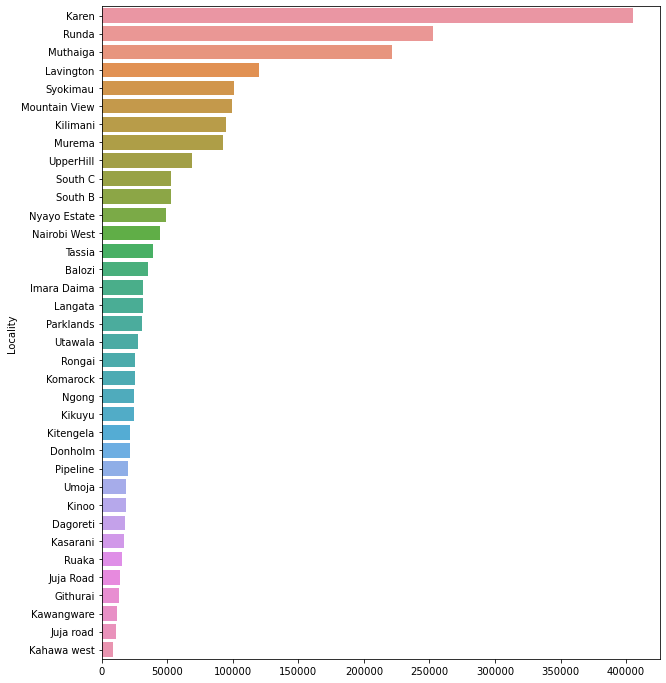

In [48]:
plt.figure(figsize=(10,12))
sns.barplot(y=df.groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).index,x=df.groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).values)
plt.show()

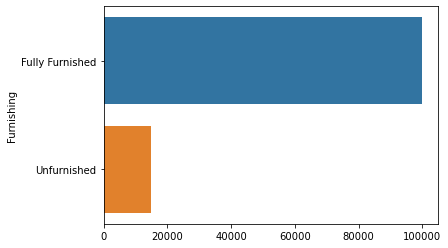

In [49]:
sns.barplot(y=df.groupby('Furnishing')['Rent/Month'].median().sort_values(ascending=False).index,x=df.groupby('Furnishing')['Rent/Month'].median().sort_values(ascending=False).values)
plt.show()

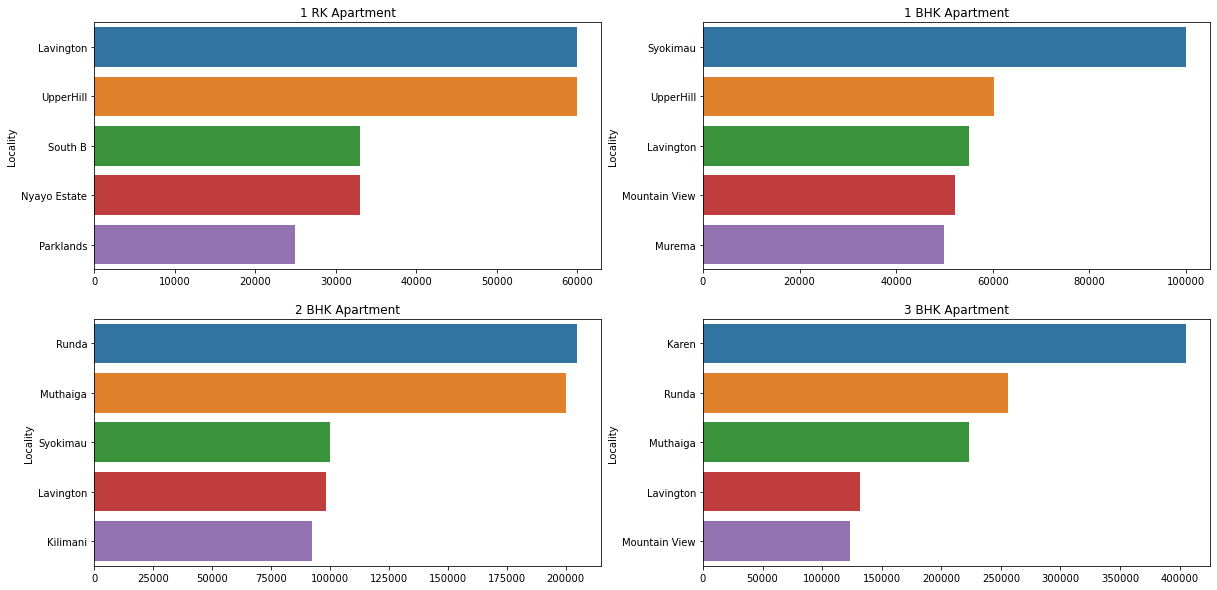

In [50]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(y=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('1 RK Apartment')

plt.subplot(2,2,2)
sns.barplot(y=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('1 BHK Apartment')

plt.subplot(2,2,3)
sns.barplot(y=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('2 BHK Apartment')

plt.subplot(2,2,4)
sns.barplot(y=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().index,x=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head().values)
plt.title('3 BHK Apartment')
plt.show()

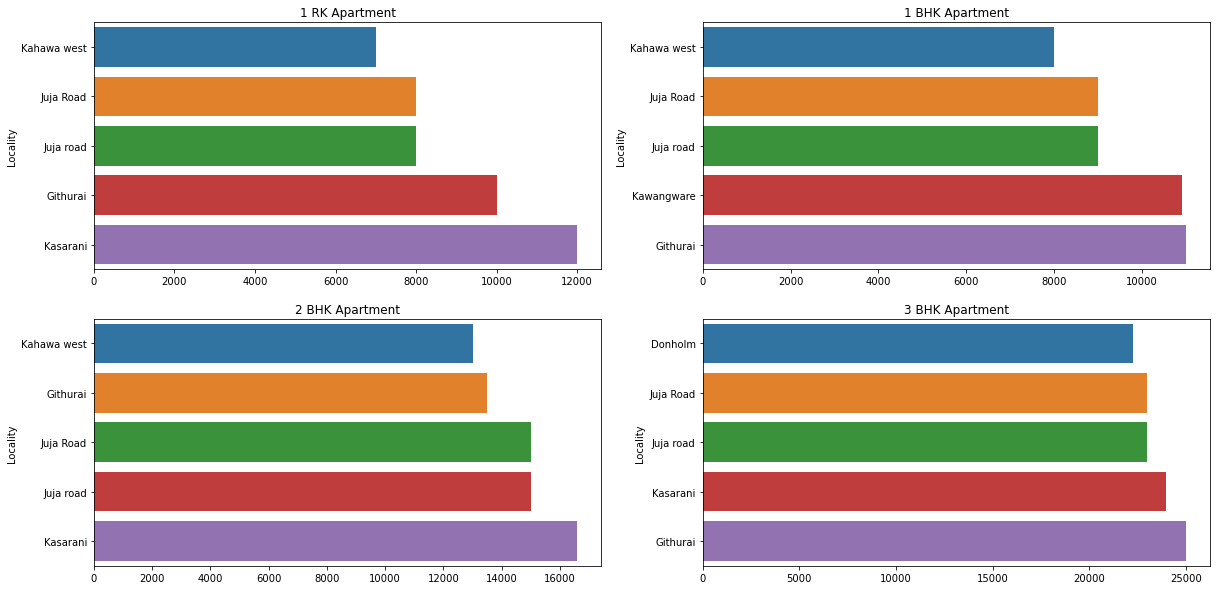

In [51]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(y=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='1 RK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('1 RK Apartment')

plt.subplot(2,2,2)
sns.barplot(y=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='1 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('1 BHK Apartment')

plt.subplot(2,2,3)
sns.barplot(y=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='2 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('2 BHK Apartment')

plt.subplot(2,2,4)
sns.barplot(y=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().index,x=df[df.Type=='3 BHK Apartment'].groupby('Locality')['Rent/Month'].mean().sort_values(ascending=True).head().values)
plt.title('3 BHK Apartment')
plt.show()

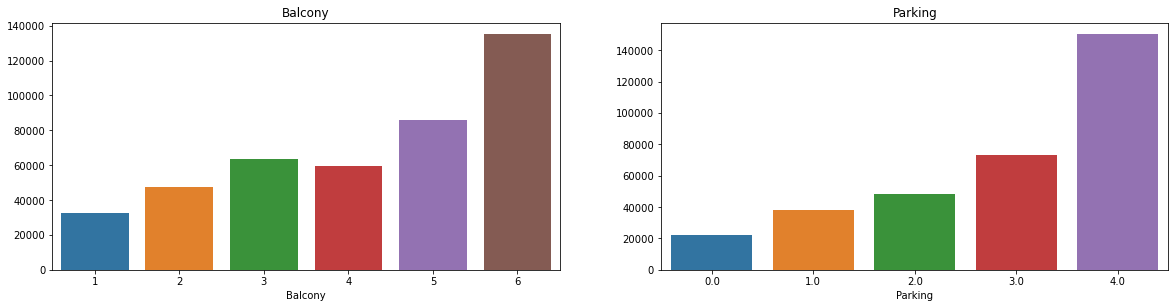

In [52]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(x=df.groupby('Balcony')['Rent/Month'].mean().sort_values(ascending=True).index,y=df.groupby('Balcony')['Rent/Month'].mean().sort_values(ascending=True).values)
plt.title('Balcony')

plt.subplot(2,2,2)
sns.barplot(x=df.groupby('Parking')['Rent/Month'].mean().sort_values(ascending=True).index,y=df.groupby('Parking')['Rent/Month'].mean().sort_values(ascending=True).values)
plt.title('Parking')
plt.show()

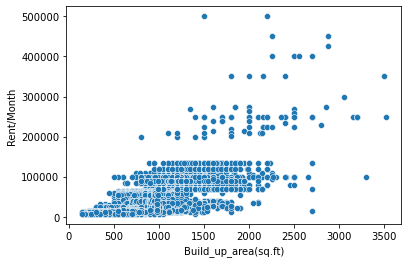

In [53]:
sns.scatterplot(x=df['Build_up_area(sq.ft)'],y=df['Rent/Month'])
plt.show()

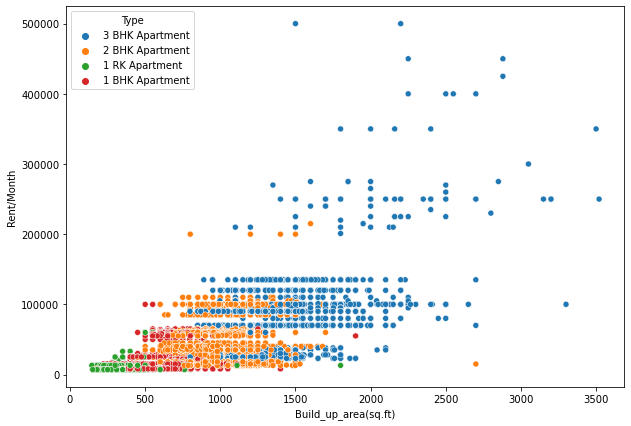

In [54]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Build_up_area(sq.ft)'],y=df['Rent/Month'],hue=df.Type)
plt.show()

In [55]:
newdf = df.copy()
newdf

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
0,Karen,3 BHK Apartment,500000,1500,Unfurnished,3,3,1.0
1,Karen,3 BHK Apartment,500000,2200,Fully Furnished,3,1,2.0
2,Karen,3 BHK Apartment,450000,2250,Unfurnished,4,1,0.0
3,Karen,3 BHK Apartment,450000,2880,Unfurnished,4,1,0.0
4,Karen,3 BHK Apartment,425000,2880,Unfurnished,3,1,2.0
...,...,...,...,...,...,...,...,...
8715,Kahawa west,1 RK Apartment,7000,180,Unfurnished,1,1,0.0
8716,Kahawa west,1 RK Apartment,7000,180,Unfurnished,1,1,0.0
8717,Ruaka,1 RK Apartment,13000,300,Unfurnished,1,1,0.0
8718,Kahawa west,1 RK Apartment,7000,151,Unfurnished,1,1,1.0


In [56]:
from sklearn.preprocessing import LabelEncoder
le_type = LabelEncoder()
df["Type"]=le_type.fit_transform(df["Type"])
df["Type"].unique()

array([3, 2, 1, 0])

In [57]:
le_furnishing = LabelEncoder()
df["Furnishing"]=le_furnishing.fit_transform(df["Furnishing"])
df["Furnishing"].unique()

array([1, 0])

In [58]:
le_locality = LabelEncoder()
df["Locality"]=le_locality.fit_transform(df["Locality"])
df["Locality"].unique()

array([ 8, 28, 20, 12, 29, 30, 17, 19,  4, 23, 34, 33, 25, 35, 31, 32, 14,
        9, 13, 18,  2, 16, 11, 26, 15,  1, 10,  3, 21,  0, 22,  7, 27,  5,
       24,  6])

In [59]:
df.Parking=df.Parking.astype('int')

In [60]:
df.dtypes

Locality                int32
Type                    int32
Rent/Month              int64
Build_up_area(sq.ft)    int32
Furnishing              int32
Bathrooms               int32
Balcony                 int32
Parking                 int32
dtype: object

In [61]:
X=df.copy()

In [62]:
X.drop('Rent/Month', axis=1, inplace=True)

In [63]:
X

,Locality,Type,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking
0,8,3,1500,1,3,3,1
1,8,3,2200,0,3,1,2
2,8,3,2250,1,4,1,0
3,8,3,2880,1,4,1,0
4,8,3,2880,1,3,1,2
...,...,...,...,...,...,...,...
8715,7,1,180,1,1,1,0
8716,7,1,180,1,1,1,0
8717,27,1,300,1,1,1,0
8718,7,1,151,1,1,1,1


In [64]:
Y=df['Rent/Month']

In [65]:
Y

0       500000
1       500000
2       450000
3       450000
4       425000
         ...  
8715      7000
8716      7000
8717     13000
8718      7000
8719     13000
Name: Rent/Month, Length: 8720, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Modelling

#### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [68]:
# Evaluation
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

lracc = r2_score(Y_test,Y_pred)
print('Score ->',lracc)

lrrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',lrrmse)

Score -> 0.6622195141644949
RMSE -> 24236.073578745578


#### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
Y_pred1=dtr.predict(X_test)

In [70]:
dtracc = r2_score(Y_test,Y_pred1)
print('Score ->',dtracc)

dtrrmse = np.sqrt(mean_squared_error(Y_test,Y_pred1))
print('RMSE ->',dtrrmse)

Score -> 0.9663584056360333
RMSE -> 7648.6232497215715


#### Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=101,min_samples_split=15,max_features='auto',min_samples_leaf=2,
                                        criterion='mae')
rf.fit(X_train,Y_train)
Y_pred2=rf.predict(X_test)

In [72]:
rfacc = r2_score(Y_test,Y_pred2)
print('Score ->',rfacc)

rfrmse = np.sqrt(mean_squared_error(Y_test,Y_pred2))
print('RMSE ->',rfrmse)

Score -> 0.9730556022669562
RMSE -> 6845.090976280277


#### Gradient Boosting Regressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=2,
                                            max_features='auto',loss='ls',learning_rate=0.5,criterion='mae')
#fit the model on the data and predict the values
gb.fit(X_train,Y_train)

Y_pred3=gb.predict(X_test)

In [74]:
gbacc = r2_score(Y_test,Y_pred3)
print('Score ->',gbacc)

gbrmse = np.sqrt(mean_squared_error(Y_test,Y_pred3))
print('RMSE ->',gbrmse)

Score -> 0.9580871567305053
RMSE -> 8537.260747661636


#### ExtraTree Regressor

In [75]:
from sklearn.ensemble import ExtraTreesRegressor

et=ExtraTreesRegressor(n_estimators=100,min_samples_split=3,min_samples_leaf=1,max_features='log2',
                                      criterion='mae')

#fit the model on the data and predict the values
et.fit(X_train,Y_train)

Y_pred4=et.predict(X_test)


In [76]:
etacc = r2_score(Y_test,Y_pred4)
print('Score ->',etacc)

etrmse = np.sqrt(mean_squared_error(Y_test,Y_pred4))
print('RMSE ->',etrmse)

Score -> 0.9028993752318913
RMSE -> 12994.392972690728


##### Comparison of Models

In [77]:
performance_df = pd.DataFrame([[lracc,dtracc,rfacc,gbacc,etacc],[lrrmse,dtrrmse,rfrmse,gbrmse,etrmse]]).T

In [78]:
performance_df.columns = ['Accuracy','RMSE']
performance_df.index = ['Logistic Regression','Decision Tree','Extra Tree','Random Forest','Gradient Boost']

In [79]:
performance_df

,Accuracy,RMSE
Logistic Regression,0.662220,24236.073579
Decision Tree,0.966358,7648.623250
Extra Tree,0.973056,6845.090976
Random Forest,0.958087,8537.260748
Gradient Boost,0.902899,12994.392973


In [80]:
performance_df.sort_values(by='RMSE')

,Accuracy,RMSE
Extra Tree,0.973056,6845.090976
Decision Tree,0.966358,7648.623250
Random Forest,0.958087,8537.260748
Gradient Boost,0.902899,12994.392973
Logistic Regression,0.662220,24236.073579


In [81]:
performance_df.Accuracy.sort_values(ascending=False)

Extra Tree             0.973056
Decision Tree          0.966358
Random Forest          0.958087
Gradient Boost         0.902899
Logistic Regression    0.662220
Name: Accuracy, dtype: float64

Text(0.5, 1.0, 'RMSE')

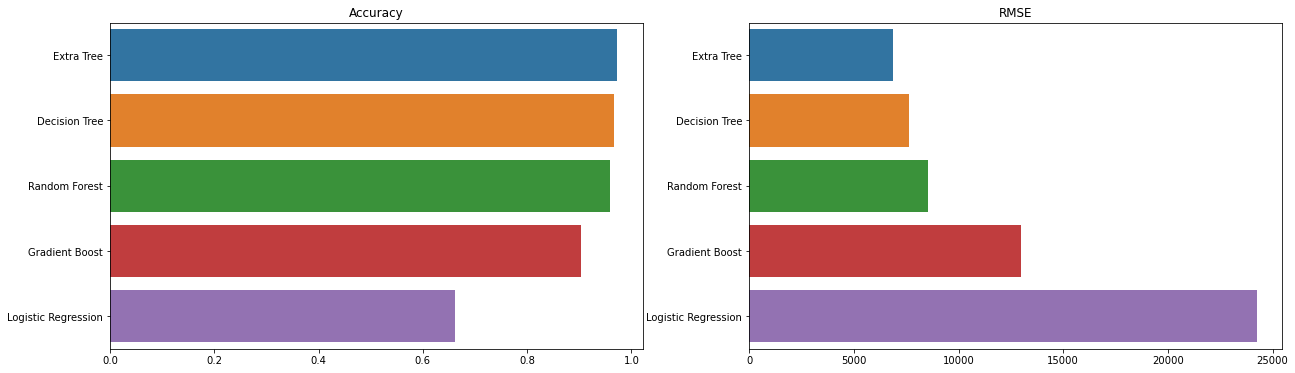

In [82]:
plt.figure(figsize=(21,6))
plt.subplot(1,2,1)
sns.barplot(x=performance_df.Accuracy.sort_values(ascending=False).values,y=performance_df.Accuracy.sort_values(ascending=False).index)
plt.title('Accuracy')
plt.subplot(1,2,2)
sns.barplot(x=performance_df.RMSE.sort_values(ascending=True).values,y=performance_df.RMSE.sort_values(ascending=True).index)
plt.title('RMSE')

#### Voting Classifier

In [83]:
from sklearn.ensemble import VotingRegressor

model_list = [('dtr',dtr),('et',et),('rf',rf)]
# create the sub models
estimators = model_list

# create the ensemble model
ensemble = VotingRegressor(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)

In [84]:
vcacc = r2_score(Y_test,Y_pred)
print('Score ->',vcacc)

vcrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',vcrmse)

Score -> 0.9743922209767368
RMSE -> 6673.1508291345535


(0.0, 310000.0)

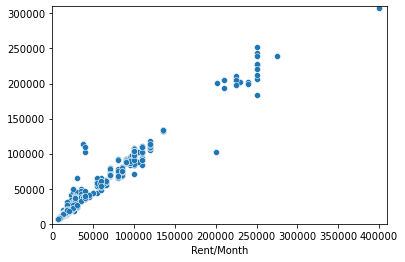

In [85]:
sns.scatterplot(x=Y_test,y=Y_pred)
plt.xlim(0,410000)
plt.ylim(0,310000)

<AxesSubplot:xlabel='Rent/Month', ylabel='Density'>

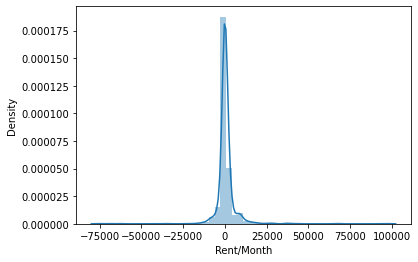

In [86]:
sns.distplot(Y_test-Y_pred)

###### Dump Model

In [87]:
import pickle
pickle.dump(ensemble,open('FinalModel.pkl','wb'))
print('Done')

Done
